In [2]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
hotel_df=pd.read_csv('hotel_bookings.csv')
print(hotel_df)

               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July     

In [4]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
hotel_df['lead_time'].max()

737

In [10]:
hotel_df['stays_in_weekend_nights'].mean()

0.9275986263506156

In [11]:
hotel_df['lead_time'].argmax()

1

In [12]:
hotel_df.shape

(119390, 32)

In [13]:
hotel_df.max(numeric_only=True)

is_canceled                          1.0
lead_time                          737.0
arrival_date_year                 2017.0
arrival_date_week_number            53.0
arrival_date_day_of_month           31.0
stays_in_weekend_nights             19.0
stays_in_week_nights                50.0
adults                              55.0
children                            10.0
babies                              10.0
is_repeated_guest                    1.0
previous_cancellations              26.0
previous_bookings_not_canceled      72.0
booking_changes                     21.0
agent                              535.0
company                            543.0
days_in_waiting_list               391.0
adr                               5400.0
required_car_parking_spaces          8.0
total_of_special_requests            5.0
dtype: float64

In [14]:
hotel_df[hotel_df.hotel=='Resort Hotel']['arrival_date_year'].value_counts()  #In 2016 resort hotel has most bookings

arrival_date_year
2016    18567
2017    13179
2015     8314
Name: count, dtype: int64

In [15]:
hotel_df[hotel_df.hotel=='City Hotel']['arrival_date_year'].value_counts()

arrival_date_year
2016    38140
2017    27508
2015    13682
Name: count, dtype: int64

In [16]:
hotel_df.iloc[:3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [17]:
hotel_df.loc[:3]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [18]:
#filtering rows conditionally figuring the lead time for each hotel
df=hotel_df[(hotel_df['lead_time']>=100) & (hotel_df['hotel']=='Resort Hotel')]
df['lead_time'].sum()

2993567

In [19]:
df=hotel_df[(hotel_df['lead_time']>=100) & (hotel_df['hotel']=='City Hotel')]
df['lead_time'].sum() #city hotel has highest lead time

7019246

In [20]:
#sorting
hotel_df['lead_time'].sort_values().tail() #highest lead_times recorded.

65235    629
65231    629
65245    629
4182     709
1        737
Name: lead_time, dtype: int64

In [21]:
#grouping
hotel_df.groupby('hotel')['stays_in_week_nights'].sum() #it might tell that city hotel might be busy on week days

hotel
City Hotel      173174
Resort Hotel    125337
Name: stays_in_week_nights, dtype: int64

In [22]:
#extracting rows
hotel_df[['hotel','country']].head(5)

,hotel,country
0,Resort Hotel,PRT
1,Resort Hotel,PRT
2,Resort Hotel,GBR
3,Resort Hotel,GBR
4,Resort Hotel,GBR


In [23]:
#detecting null values in each column
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [24]:
#filling the null values with zero 
hotel_df.fillna(0,inplace=True)

In [25]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [26]:
#removing the rows with no adults,children or babies present
false_df=hotel_df[(hotel_df['children']==0) & (hotel_df['babies']==0) & (hotel_df['adults']==0)]
ind_false=false_df.index.values

In [27]:
hotel_df.drop(ind_false,inplace=True)

In [28]:
hotel_df.reset_index(inplace=True,drop=True)

In [29]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

In [30]:
#plotting
city_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='City Hotel'])
resort_df =pd.DataFrame(hotel_df[hotel_df['hotel'] =='Resort Hotel'])

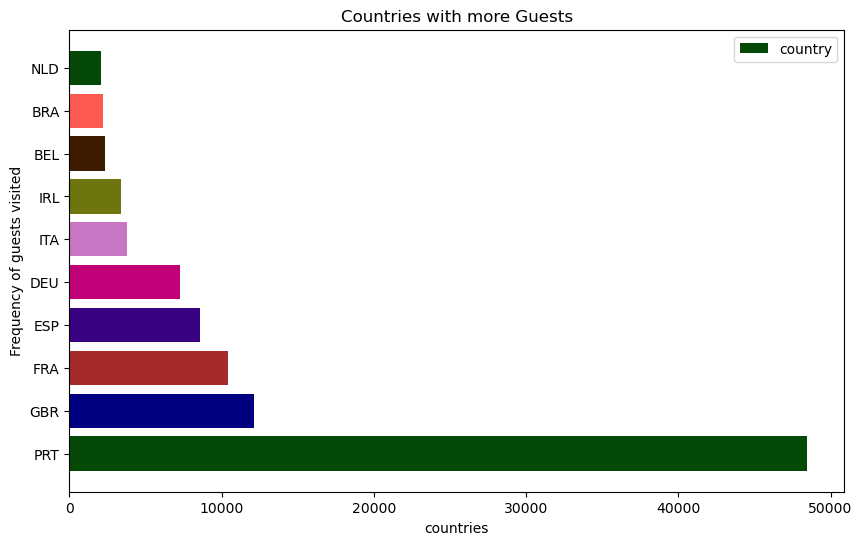

In [31]:
#barh-plot
y=list(hotel_df['country'].value_counts().sort_values(ascending=False).head(10))
x=list(hotel_df['country'].value_counts().head(10).index)
plt.figure(figsize=(10,6))
plt.barh(x,y,color=['#054907','#000080','#A52A2A','#380282','#C20078','#C875C4','#6E750E','#3D1C02','#FC5A50'])
plt.xlabel('countries')
plt.ylabel('Frequency of guests visited')
plt.title('Countries with more Guests')
plt.legend(['country'],loc='upper right')
plt.savefig('bar.png')
plt.show()         #analysis portugal has more visitors for both hotels combinedly.

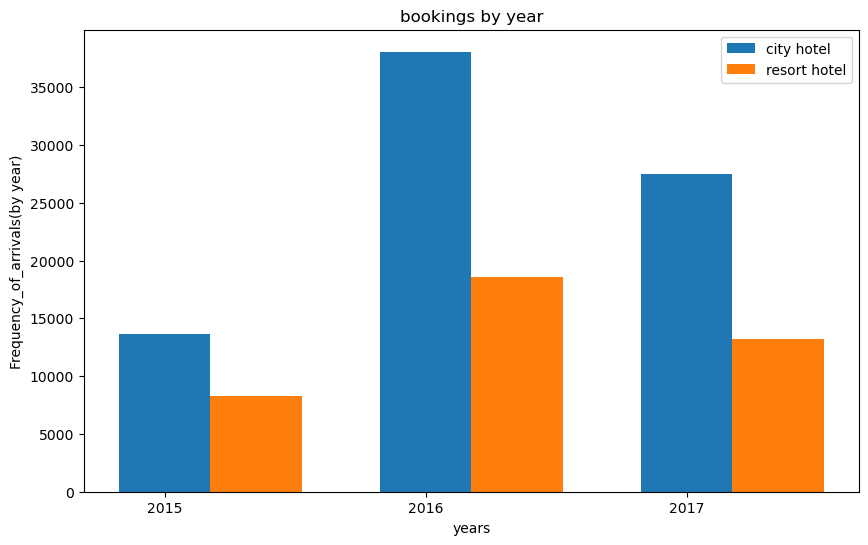

In [32]:
#bar plot finding no.of bookings per year for both hotel
a=city_df['arrival_date_year'].value_counts().index
b=city_df['arrival_date_year'].value_counts()
c=resort_df['arrival_date_year'].value_counts().index
d=resort_df['arrival_date_year'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(a,b,width=0.35)
plt.bar(c+0.35,d,width=0.35)
plt.xticks([2015,2016,2017])
plt.title('bookings by year')
plt.ylabel('Frequency_of_arrivals(by year)')
plt.xlabel('years')
plt.legend(['city hotel','resort hotel'])
plt.savefig('year.png')
plt.show()

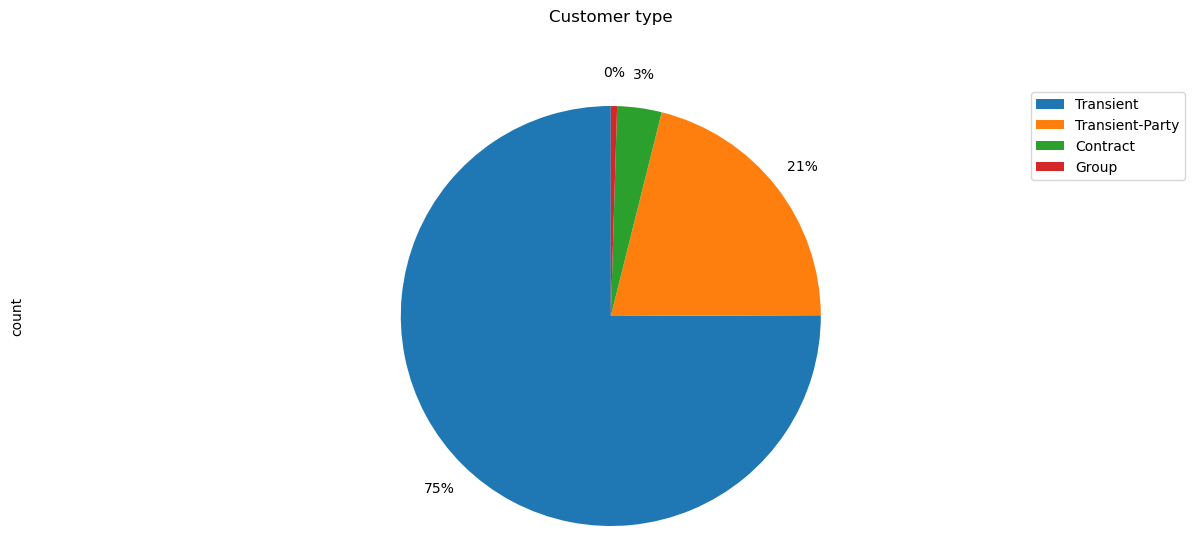

In [33]:
#pie charts -seeing the percentage of hotels and  checking the customer type in booking
df=hotel_df['customer_type'].value_counts()
df.plot(kind='pie',startangle=90,figsize=(15,6),
                              autopct="%1.0f%%"
                               ,pctdistance=1.16,labels=None)   #it means that the reservations are happening directly with hotels 
plt.title('Customer type',y=1.12)
plt.axis('equal') 
plt.legend(labels=df.index,loc='upper right')
plt.savefig('pie.png')
plt.show();

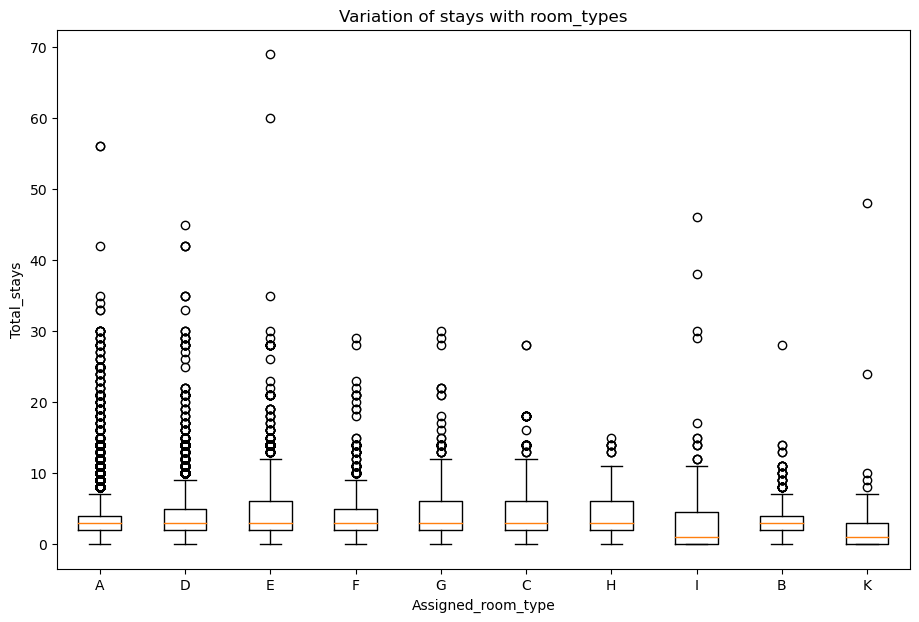

In [34]:
#box plot room type and no.of stays
hotel_df['total_stays']=hotel_df['stays_in_weekend_nights']+hotel_df['stays_in_week_nights']
df1=hotel_df[hotel_df.assigned_room_type=='A']['total_stays']
df2=hotel_df[hotel_df.assigned_room_type=='D']['total_stays']
df3=hotel_df[hotel_df.assigned_room_type=='E']['total_stays']
df4=hotel_df[hotel_df.assigned_room_type=='F']['total_stays']
df5=hotel_df[hotel_df.assigned_room_type=='G']['total_stays']
df6=hotel_df[hotel_df.assigned_room_type=='C']['total_stays']
df7=hotel_df[hotel_df.assigned_room_type=='H']['total_stays']
df8=hotel_df[hotel_df.assigned_room_type=='I']['total_stays']
df9=hotel_df[hotel_df.assigned_room_type=='B']['total_stays']
df10=hotel_df[hotel_df.assigned_room_type=='K']['total_stays']
box_plot_data=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
plt.figure(figsize=(11,7))  #comparing the outliers,A is the most preferred room type and about 75% of the people stays more than 5 days.
plt.boxplot(box_plot_data,labels=['A','D','E','F','G','C','H','I','B','K'])
plt.xlabel('Assigned_room_type')
plt.ylabel('Total_stays')
plt.title('Variation of stays with room_types')
plt.savefig('box.png')
plt.show()

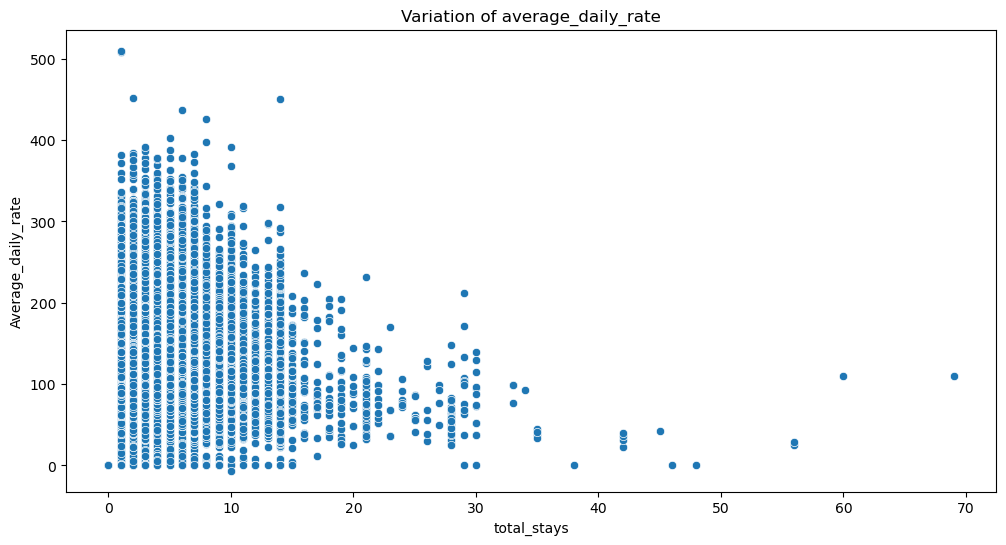

In [35]:
#scatter plot
plt.figure(figsize = (12,6))
xplot=hotel_df[hotel_df['adr'] <= 5000]['total_stays']
yplot=hotel_df[hotel_df['adr'] <= 5000]['adr']
sns.scatterplot(x=xplot,y=yplot,data=hotel_df)
plt.ylabel('Average_daily_rate')   #Analysis-- as  no.of stays increases adr decreases(kind of discount)
plt.title('Variation of average_daily_rate')
plt.savefig('scatter.png')
plt.show()

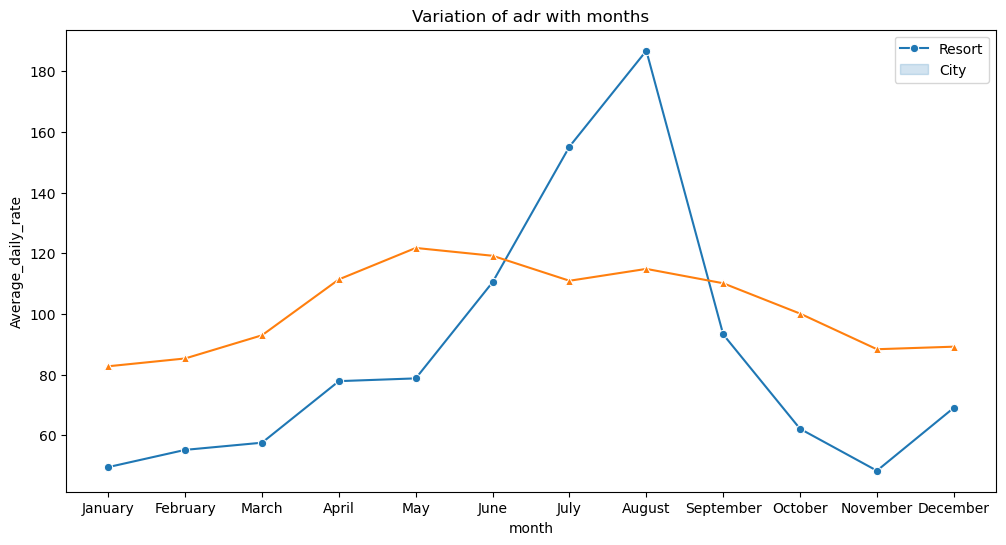

In [36]:
#line plot-finding out which month is the priciest
#changing months categorically
city_data=city_df.groupby('arrival_date_month')['adr'].mean().reset_index()              #resetting index from months to numbers
resort_data=resort_df.groupby('arrival_date_month')['adr'].mean().reset_index()
final_data = resort_data.merge(city_data,on="arrival_date_month")
final_data.rename(columns={'arrival_date_month':'month','adr_x':'resort_adr','adr_y':'city_adr'},inplace=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_data['month'] = pd.Categorical(final_data['month'], categories=months, ordered=True)
plt.figure(figsize=(12,6))
sns.lineplot(data=final_data,x="month",y="resort_adr",marker='o')
sns.lineplot(data=final_data,x="month",y="city_adr",marker='^')  #priciest months for resort hotel are july,august
plt.ylabel('Average_daily_rate')                                 #for city hotel it is april,may,june
plt.legend(['Resort','City'])   
plt.title('Variation of adr with months')
plt.savefig('line.png')
plt.show()

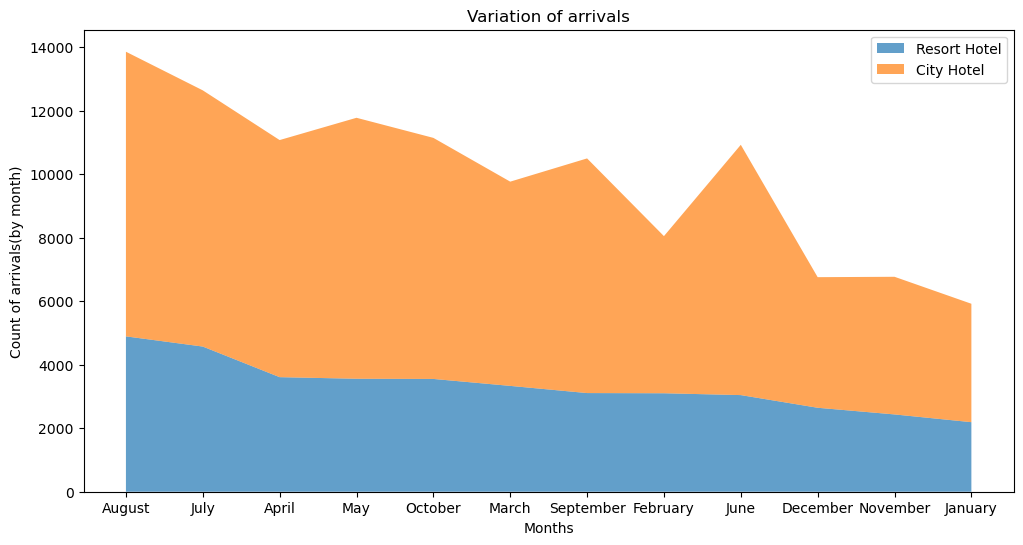

In [37]:
#area plot which month is the busiest
city_data=city_df['arrival_date_month'].value_counts().reset_index()
resort_data=resort_df['arrival_date_month'].value_counts().reset_index()
final_guest=resort_data.merge(city_data,on="arrival_date_month")
final_guest.rename(columns={'arrival_date_month':'month','count_x':'resort','count_y':'city'},inplace=True)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
final_guest['month'] = pd.Categorical(final_guest['month'], categories=months, ordered=True)
plt.rcParams['figure.figsize'] = [12, 6]
x=final_guest['month']
y=np.vstack([final_guest['resort'],final_guest['city']])
fig,ax=plt.subplots()
ax.stackplot(x,y,alpha=0.7)   #seems like august,july are the busiest months
plt.xlabel('Months')
plt.ylabel('Count of arrivals(by month)')
plt.title('Variation of arrivals')
plt.legend(['Resort Hotel','City Hotel'])
plt.savefig('area.png')
plt.show()

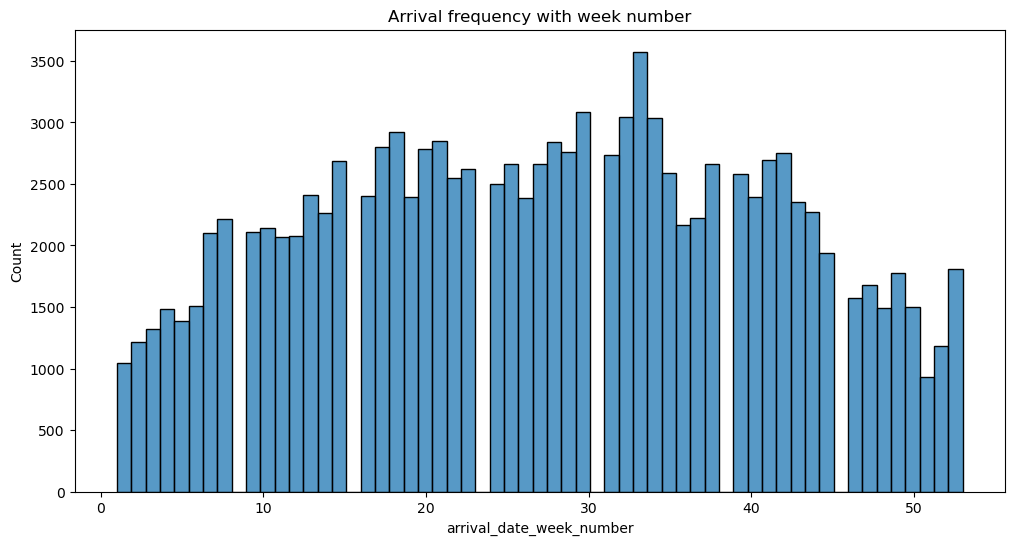

In [38]:
#histogram
plt.figure(figsize=(12,6))
sns.histplot(x='arrival_date_week_number',data=hotel_df)#between 30 and 40 week number the arrival rate is more for both
plt.title('Arrival frequency with week number')
plt.savefig('hist.png')
plt.show()

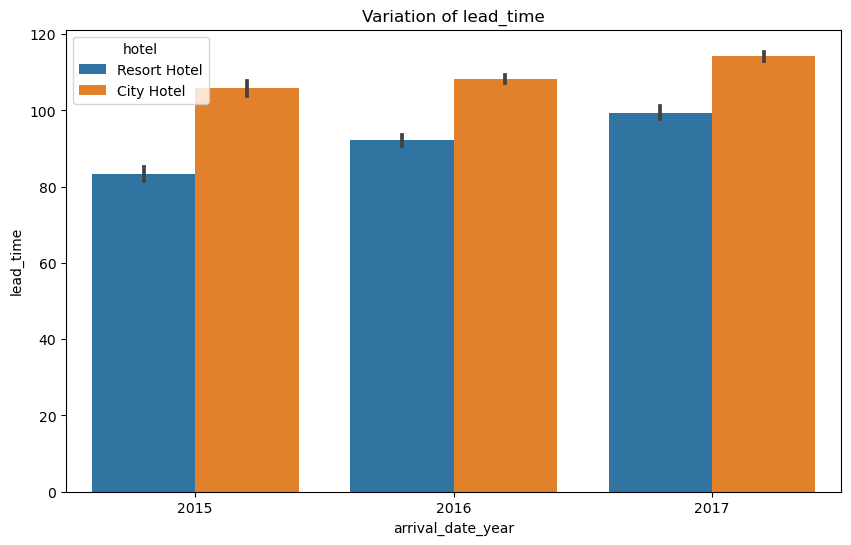

In [39]:
#bar plot  year vs lead_time
year_list=hotel_df['arrival_date_year'].unique().tolist()
plt.figure(figsize=(10,6))
sns.barplot(x='arrival_date_year',y='lead_time',data=hotel_df,hue='hotel')
plt.title('Variation of lead_time') 
plt.savefig('bar1.png')    #seems like city hotel has the highest lead_time because it has busiest months than resort hotel
plt.show()

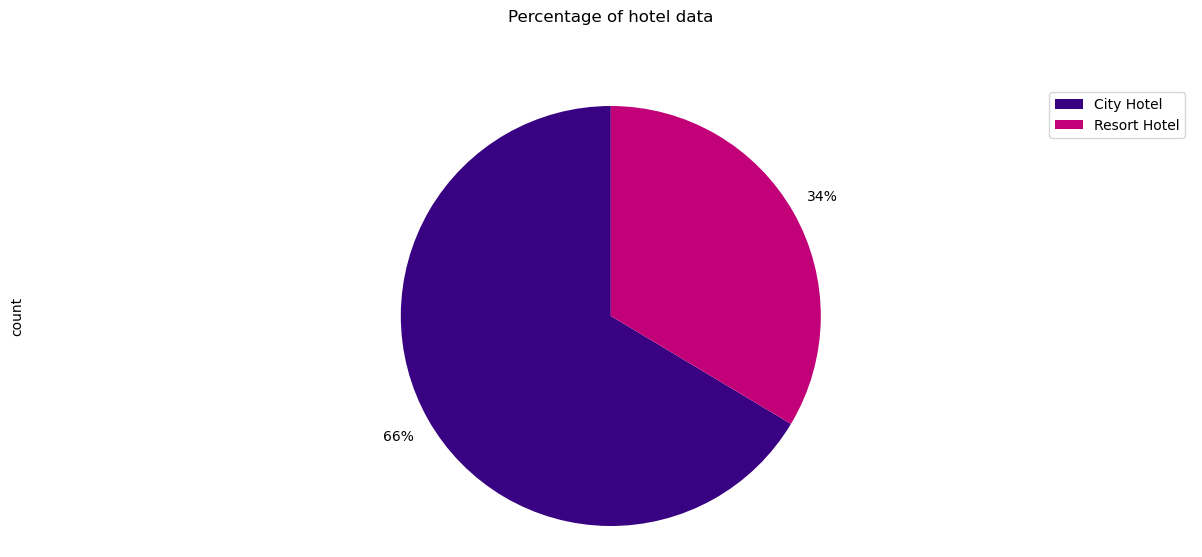

In [40]:
#pie chart
df= hotel_df['hotel'].value_counts()
df.plot(kind='pie',startangle=90,figsize=(15,6),
                              autopct="%1.0f%%"
                               ,pctdistance=1.16,labels=None,colors=['#380282','#C20078'])    
plt.title('Percentage of hotel data',y=1.12)
plt.axis('equal') 
plt.legend(labels=df.index,loc='upper right')    #City hotels data is more than the resort hotel's data in the given dataset
plt.savefig('pie1.png')
plt.show();

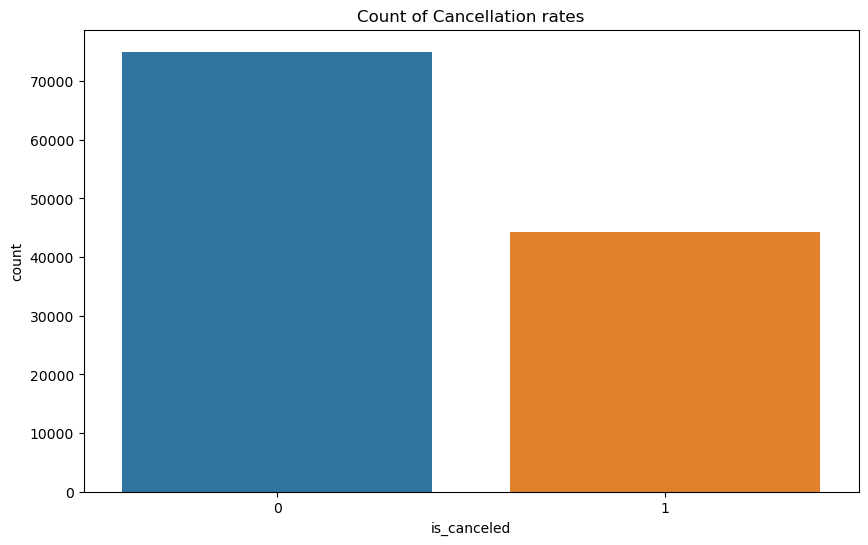

In [41]:
#count plot (No.of Cancellations)
plt.figure(figsize = (10,6))
sns.countplot(x='is_canceled',data=hotel_df)
plt.title('Count of Cancellation rates')     #The cancelled bookings are less  than the non-cancelled ones
plt.savefig('bar2.png')
plt.show()

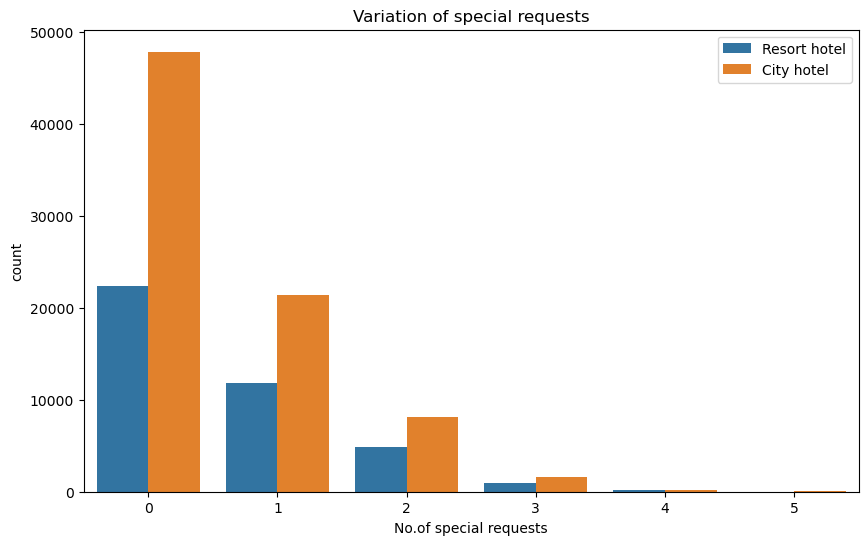

In [42]:
#count plot 2
plt.figure(figsize =(10,6))
sns.countplot(x ='total_of_special_requests', hue ='hotel',data=hotel_df)
plt.xlabel('No.of special requests')
plt.title('Variation of special requests')
plt.legend(['Resort hotel','City hotel']) 
plt.show()

In [43]:
#MODEL BUILDING
#Applying Machine Learning Algorithms
train_df,test_df = train_test_split(hotel_df,test_size=0.2,random_state = 42)

In [12]:
train_df.shape

(95368, 33)

In [13]:
test_df.shape

(23842, 33)

In [14]:
train_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
8924,Resort Hotel,1,386,2016,October,43,20,1,3,2,...,0.0,0.0,0,Transient-Party,49.00,0,0,Canceled,2016-09-14,4
85719,City Hotel,0,5,2016,March,12,19,2,1,2,...,1.0,0.0,0,Transient-Party,93.33,0,0,Check-Out,2016-03-22,3
17346,Resort Hotel,0,270,2015,September,40,28,3,7,2,...,95.0,0.0,0,Transient,52.00,0,0,Check-Out,2015-10-08,10
101496,City Hotel,0,12,2016,November,46,11,2,2,2,...,7.0,0.0,0,Transient,86.40,0,3,Check-Out,2016-11-15,4
67920,City Hotel,1,20,2017,May,19,10,0,2,1,...,0.0,452.0,0,Transient-Party,110.00,0,0,Canceled,2017-04-21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,City Hotel,1,239,2015,October,42,17,0,1,2,...,1.0,0.0,0,Transient,60.00,0,0,Canceled,2015-08-17,1
110268,City Hotel,0,30,2017,April,17,27,0,1,1,...,9.0,0.0,0,Transient,124.00,0,1,Check-Out,2017-04-28,1
103694,City Hotel,0,17,2016,December,53,30,0,2,2,...,9.0,0.0,0,Transient,138.00,0,2,Check-Out,2017-01-01,2
860,Resort Hotel,1,130,2015,August,31,1,2,5,2,...,240.0,0.0,0,Transient,120.60,0,2,Canceled,2015-05-19,7


In [15]:
test_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stays
115236,City Hotel,0,405,2017,July,27,4,0,2,2,...,6.0,0.0,0,Transient-Party,114.40,0,0,Check-Out,2017-07-06,2
110223,City Hotel,0,74,2017,April,17,23,2,2,2,...,9.0,0.0,0,Transient,144.00,0,2,Check-Out,2017-04-27,4
59442,City Hotel,1,247,2016,October,44,28,1,2,2,...,37.0,0.0,0,Transient,110.00,0,0,Canceled,2016-03-15,3
67257,City Hotel,1,157,2017,May,18,1,1,3,2,...,3.0,0.0,0,Transient,130.00,0,0,Canceled,2016-11-25,4
88761,City Hotel,0,3,2017,January,1,5,0,1,2,...,9.0,0.0,0,Transient,88.00,0,1,Check-Out,2017-01-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71787,City Hotel,1,9,2017,July,28,13,0,3,2,...,9.0,0.0,0,Transient,126.00,0,1,Canceled,2017-07-05,3
115753,City Hotel,0,160,2017,July,28,10,1,2,2,...,9.0,0.0,0,Transient,107.10,0,1,Check-Out,2017-07-13,3
96053,City Hotel,0,287,2016,August,35,24,1,4,2,...,0.0,0.0,0,Transient,76.71,0,0,Check-Out,2016-08-29,5
29557,Resort Hotel,0,170,2016,October,43,17,4,10,2,...,243.0,0.0,0,Transient,49.50,0,1,Check-Out,2016-10-31,14


In [14]:
#distributing reservation date
train_df['reservation_status_date'] = pd.to_datetime(train_df['reservation_status_date'])
train_df['year'] = train_df['reservation_status_date'].dt.year
train_df['month'] = train_df['reservation_status_date'].dt.month
train_df['day'] = train_df['reservation_status_date'].dt.day
train_df.drop('reservation_status_date',axis=1,inplace=True)
train_df['year']=train_df['year'].astype('str')
train_df['month']=train_df['month'].astype('str')
train_df['day']=train_df['day'].astype('str')


In [15]:
#distributing reservation date
test_df['reservation_status_date'] = pd.to_datetime(test_df['reservation_status_date'])
test_df['year'] = test_df['reservation_status_date'].dt.year
test_df['month'] = test_df['reservation_status_date'].dt.month
test_df['day'] = test_df['reservation_status_date'].dt.day
test_df.drop('reservation_status_date',axis=1,inplace=True)
test_df['year']=test_df['year'].astype('str')
test_df['month']=test_df['month'].astype('str')
test_df['day']=test_df['day'].astype('str')
test_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stays,year,month,day
115236,City Hotel,0,405,2017,July,27,4,0,2,2,...,0,Transient-Party,114.4,0,0,Check-Out,2,2017,7,6
110223,City Hotel,0,74,2017,April,17,23,2,2,2,...,0,Transient,144.0,0,2,Check-Out,4,2017,4,27
59442,City Hotel,1,247,2016,October,44,28,1,2,2,...,0,Transient,110.0,0,0,Canceled,3,2016,3,15
67257,City Hotel,1,157,2017,May,18,1,1,3,2,...,0,Transient,130.0,0,0,Canceled,4,2016,11,25
88761,City Hotel,0,3,2017,January,1,5,0,1,2,...,0,Transient,88.0,0,1,Check-Out,1,2017,1,6


In [16]:
#removing some columns
target_col = 'is_canceled'
train_targets = train_df[target_col].copy()
test_targets = test_df[target_col].copy()
train_df.drop(columns=['is_canceled','reservation_status','country','booking_changes','arrival_date_year'],axis=1,inplace=True)
test_df.drop(columns=['is_canceled','reservation_status','country','booking_changes','arrival_date_year'],axis=1,inplace=True)
input_cols = train_df.columns.tolist()

In [17]:
train_inputs = train_df[input_cols].copy()

In [18]:
test_inputs = test_df[input_cols].copy()

In [40]:
train_inputs.head(5)

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,year,month,day
8924,Resort Hotel,386,October,43,20,1,3,2,0.0,0,...,0.0,0,Transient-Party,49.00,0,0,4,2016,9,14
85719,City Hotel,5,March,12,19,2,1,2,0.0,0,...,0.0,0,Transient-Party,93.33,0,0,3,2016,3,22
17346,Resort Hotel,270,September,40,28,3,7,2,0.0,0,...,0.0,0,Transient,52.00,0,0,10,2015,10,8
101496,City Hotel,12,November,46,11,2,2,2,0.0,0,...,0.0,0,Transient,86.40,0,3,4,2016,11,15
67920,City Hotel,20,May,19,10,0,2,1,0.0,0,...,452.0,0,Transient-Party,110.00,0,0,2,2017,4,21


In [19]:
test_targets.head(10)
test_targets.shape

(23842,)

In [20]:
numeric_cols= train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [21]:
train_inputs[categorical_cols].nunique()

hotel                    2
arrival_date_month      12
meal                     5
market_segment           8
distribution_channel     5
reserved_room_type       9
assigned_room_type      11
deposit_type             3
customer_type            4
year                     4
month                   12
day                     31
dtype: int64

In [22]:
#normalizing the values for better weights distribution
scaler = MinMaxScaler()

In [23]:
scaler.fit(train_df[numeric_cols])

MinMaxScaler()

In [24]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -6.38,
 0.0,
 0.0,
 0.0]

In [25]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[737.0,
 53.0,
 31.0,
 19.0,
 50.0,
 50.0,
 10.0,
 10.0,
 1.0,
 26.0,
 70.0,
 535.0,
 543.0,
 391.0,
 5400.0,
 8.0,
 5.0,
 69.0]

In [26]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [82]:
train_inputs[numeric_cols].describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays
count,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000,95368.000000
mean,0.141435,0.502849,0.493366,0.048747,0.050007,0.037199,0.010356,0.000800,0.031604,0.003320,0.001954,0.139709,0.019811,0.005854,0.020047,0.007735,0.114252,0.049660
std,0.145124,0.261691,0.292634,0.052397,0.037969,0.011353,0.039738,0.009534,0.174944,0.032008,0.021176,0.199796,0.099464,0.044342,0.009453,0.030570,0.158495,0.036842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024423,0.288462,0.233333,0.000000,0.020000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013084,0.000000,0.000000,0.014072,0.000000,0.000000,0.028986
50%,0.093623,0.519231,0.500000,0.052632,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016822,0.000000,0.000000,0.018746,0.000000,0.000000,0.043478
75%,0.218453,0.711538,0.733333,0.105263,0.060000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.284112,0.000000,0.000000,0.024486,0.000000,0.200000,0.057971
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
train_inputs[numeric_cols]   

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays
8924,0.523745,0.807692,0.633333,0.052632,0.06,0.04,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.010243,0.0,0.0,0.057971
85719,0.006784,0.211538,0.600000,0.105263,0.02,0.04,0.0,0.0,0.0,0.000000,0.0,0.001869,0.000000,0.0,0.018443,0.0,0.0,0.043478
17346,0.366350,0.750000,0.900000,0.157895,0.14,0.04,0.0,0.0,0.0,0.000000,0.0,0.177570,0.000000,0.0,0.010798,0.0,0.0,0.144928
101496,0.016282,0.865385,0.333333,0.105263,0.04,0.04,0.0,0.0,0.0,0.000000,0.0,0.013084,0.000000,0.0,0.017161,0.0,0.6,0.057971
67920,0.027137,0.346154,0.300000,0.000000,0.04,0.02,0.0,0.0,0.0,0.000000,0.0,0.000000,0.832413,0.0,0.021526,0.0,0.0,0.028986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,0.324288,0.788462,0.533333,0.000000,0.02,0.04,0.0,0.0,0.0,0.038462,0.0,0.001869,0.000000,0.0,0.012278,0.0,0.0,0.014493
110268,0.040706,0.307692,0.866667,0.000000,0.02,0.02,0.0,0.0,0.0,0.000000,0.0,0.016822,0.000000,0.0,0.024116,0.0,0.2,0.014493
103694,0.023066,1.000000,0.966667,0.000000,0.04,0.04,0.0,0.0,0.0,0.000000,0.0,0.016822,0.000000,0.0,0.026705,0.0,0.4,0.028986
860,0.176391,0.576923,0.000000,0.105263,0.10,0.04,0.0,0.0,0.0,0.000000,0.0,0.448598,0.000000,0.0,0.023487,0.0,0.4,0.101449


In [27]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')

In [28]:
#encoding the categorical columns
encoder.fit(train_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [29]:
encoder.categories_

[array(['City Hotel', 'Resort Hotel'], dtype=object),
 array(['April', 'August', 'December', 'February', 'January', 'July',
        'June', 'March', 'May', 'November', 'October', 'September'],
       dtype=object),
 array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object),
 array(['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups',
        'Offline TA/TO', 'Online TA', 'Undefined'], dtype=object),
 array(['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L'],
       dtype=object),
 array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object),
 array(['Contract', 'Group', 'Transient', 'Transient-Party'], dtype=object),
 array(['2014', '2015', '2016', '2017'], dtype=object),
 array(['1', '10', '11', '12', '2', '3', '4', '5', '6', '7', '8', '9'],
       dtype=object),
 array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '1

In [31]:
encoded_cols= list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['hotel_City Hotel',
 'hotel_Resort Hotel',
 'arrival_date_month_April',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'meal_BB',
 'meal_FB',
 'meal_HB',
 'meal_SC',
 'meal_Undefined',
 'market_segment_Aviation',
 'market_segment_Complementary',
 'market_segment_Corporate',
 'market_segment_Direct',
 'market_segment_Groups',
 'market_segment_Offline TA/TO',
 'market_segment_Online TA',
 'market_segment_Undefined',
 'distribution_channel_Corporate',
 'distribution_channel_Direct',
 'distribution_channel_GDS',
 'distribution_channel_TA/TO',
 'distribution_channel_Undefined',
 'reserved_room_type_A',
 'reserved_room_type_B',
 'reserved_room_type_C',
 'reserved_room_type_D',
 'reserved_room_type_E',
 'reser

In [32]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/tmp/ipykernel_6399/480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_6399/480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_6399/480032046.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns 

In [33]:
print(train_inputs.shape)
print(test_inputs.shape)
print(train_targets.shape)
print(test_targets.shape)

(95368, 136)
(23842, 136)
(95368,)
(23842,)


In [34]:
#model -LOGISTIC REGRESSION
model = LogisticRegression(solver = 'liblinear')
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

In [35]:
print(model.intercept_)

[1.48093991]


In [36]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [37]:
train_preds = model.predict(X_train)
train_preds

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
#calculating the accuracy
accuracy_score(train_targets,train_preds) #training accuracy

0.8311278416240249

In [39]:
#confusion_matrix
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.95242536, 0.04757464],
       [0.37513804, 0.62486196]])

In [40]:
test_preds = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(test_targets,test_preds)
matrix = confusion_matrix(test_targets,test_preds, normalize='true')
cl_report = classification_report(test_targets,test_preds)

print(f"Accuracy Score of Logistic Regression is : {accuracy}")
print(f"Confusion Matrix : \n{matrix}")
print(f"Classification Report : \n{cl_report}")

Accuracy Score of Logistic Regression is : 0.8298800436205016
Confusion Matrix : 
[[0.95393769 0.04606231]
 [0.37899595 0.62100405]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     14958
           1       0.89      0.62      0.73      8884

    accuracy                           0.83     23842
   macro avg       0.85      0.79      0.80     23842
weighted avg       0.84      0.83      0.82     23842



In [41]:
#DECISION TREE CLASSIFIER 
model = DecisionTreeClassifier(random_state=42)

In [42]:
%%time
model.fit(X_train,train_targets)

CPU times: user 3.19 s, sys: 63.4 ms, total: 3.25 s
Wall time: 3.25 s


DecisionTreeClassifier(random_state=42)

In [48]:
train_preds = model.predict(X_train)
acc=accuracy_score(train_preds,train_targets) #training accuracy
print(acc)

1.0


In [49]:
test_preds = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(test_targets,test_preds)
matrix = confusion_matrix(test_targets,test_preds, normalize='true')
cl_report = classification_report(test_targets,test_preds)

print(f"Accuracy Score of Logistic Regression is : {accuracy}")
print(f"Confusion Matrix : \n{matrix}")
print(f"Classification Report : \n{cl_report}")

Accuracy Score of Logistic Regression is : 0.9281520006710846
Confusion Matrix : 
[[0.94691804 0.05308196]
 [0.10344439 0.89655561]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14958
           1       0.91      0.90      0.90      8884

    accuracy                           0.93     23842
   macro avg       0.92      0.92      0.92     23842
weighted avg       0.93      0.93      0.93     23842



In [50]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [51]:
importance_df.head(10)

,feature,importance
71,deposit_type_Non Refund,0.231902
1,arrival_date_week_number,0.096308
0,lead_time,0.068340
16,total_of_special_requests,0.049374
2,arrival_date_day_of_month,0.048045
43,market_segment_Online TA,0.037436
9,previous_cancellations,0.032382
14,adr,0.028262
11,agent,0.026877
15,required_car_parking_spaces,0.017737


In [53]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(n_jobs=-1,random_state=42)

In [ ]:
model.fit(X_train,train_targets)

In [55]:
model.score(X_train,train_targets)

1.0

In [56]:
test_preds = model.predict(X_test)
#accuracy score
accuracy = accuracy_score(test_targets,test_preds)
matrix = confusion_matrix(test_targets,test_preds, normalize='true')
cl_report = classification_report(test_targets,test_preds)

print(f"Accuracy Score of Logistic Regression is : {accuracy}")
print(f"Confusion Matrix : \n{matrix}")
print(f"Classification Report : \n{cl_report}")

Accuracy Score of Logistic Regression is : 0.9495008807985907
Confusion Matrix : 
[[0.99284664 0.00715336]
 [0.12348041 0.87651959]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     14958
           1       0.99      0.88      0.93      8884

    accuracy                           0.95     23842
   macro avg       0.96      0.93      0.94     23842
weighted avg       0.95      0.95      0.95     23842



In [57]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [58]:
importance_df.head(10)

,feature,importance
0,lead_time,0.077203
71,deposit_type_Non Refund,0.074906
1,arrival_date_week_number,0.061903
70,deposit_type_No Deposit,0.061610
16,total_of_special_requests,0.044732
14,adr,0.044374
2,arrival_date_day_of_month,0.038679
9,previous_cancellations,0.033523
11,agent,0.029272
17,total_stays,0.019600
